In [2]:
!git clone https://bitbucket.org/jadslim/german-traffic-signs/src/master/

Cloning into 'master'...
remote: Counting objects: 6, done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 6 (delta 0), reused 0 (delta 0)
Unpacking objects: 100% (6/6), done.


In [3]:
!ls master

signnames.csv  test.p  train.p	valid.p


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten

import pickle
import cv2

In [0]:
with open('master/train.p', 'rb') as f:
    train_data = pickle.load(f)

with open('master/test.p', 'rb') as f:
    test_data = pickle.load(f)

with open('master/valid.p', 'rb') as f:
    val_data = pickle.load(f)

In [9]:
train_data.keys()

dict_keys(['coords', 'labels', 'features', 'sizes'])

In [0]:
X_train, y_train = train_data['features'], train_data['labels']
X_test, y_test = test_data['features'], test_data['labels']
X_val, y_val = val_data['features'], val_data['labels']

In [11]:
signnames = pd.read_csv('master/signnames.csv')
signnames

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


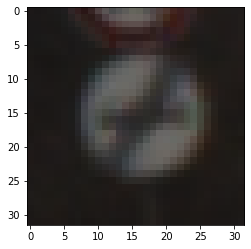

In [16]:
plt.imshow(X_train[1])

0  :  180
1  :  1980
2  :  2010
3  :  1260
4  :  1770
5  :  1650
6  :  360
7  :  1290
8  :  1260
9  :  1320
10  :  1800
11  :  1170
12  :  1890
13  :  1920
14  :  690
15  :  540
16  :  360
17  :  990
18  :  1080
19  :  180
20  :  300
21  :  270
22  :  330
23  :  450
24  :  240
25  :  1350
26  :  540
27  :  210
28  :  480
29  :  240
30  :  390
31  :  690
32  :  210
33  :  599
34  :  360
35  :  1080
36  :  330
37  :  180
38  :  1860
39  :  270
40  :  300
41  :  210
42  :  210


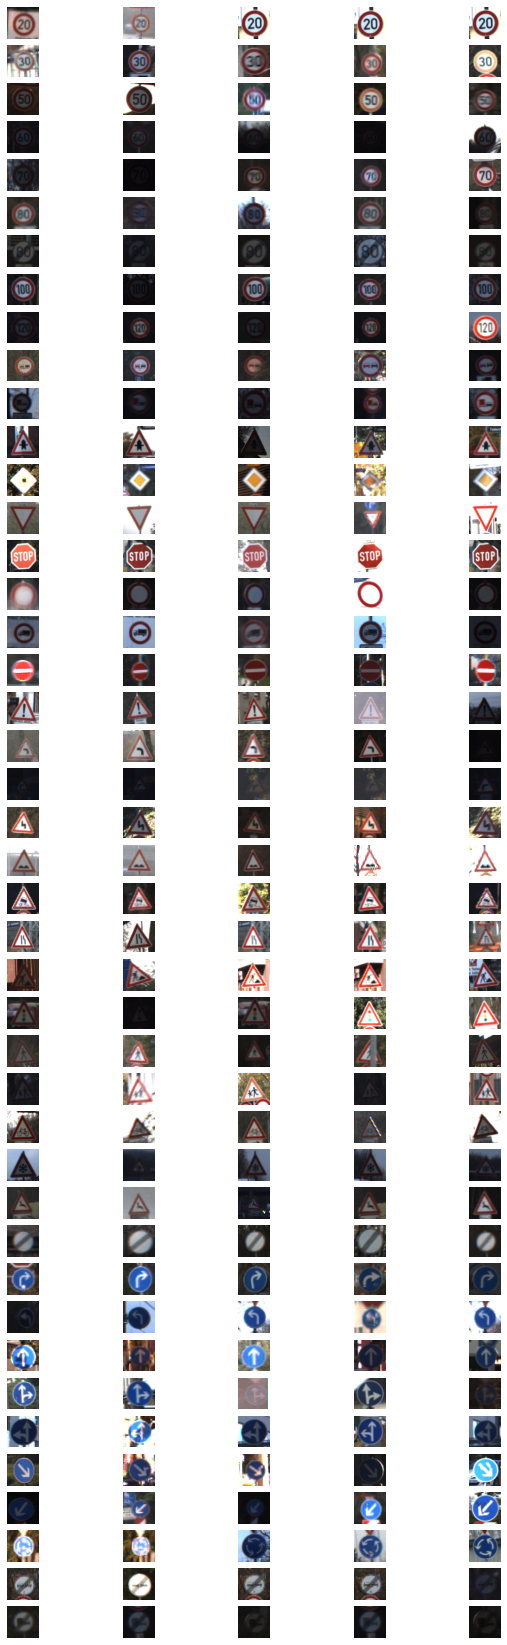

In [19]:
fig, axs = plt.subplots(nrows = 43, ncols= 5, figsize = (10,30))
for i in range(43):
    for j in range(5):
        axs[i][j].imshow(X_train[y_train==i][np.random.randint(0,len(X_train[y_train==i]))], cmap ='gray')
        axs[i][j].axis('off')
    print(i,' : ',len(X_train[y_train==i]))

In [20]:
X_train.shape

(34799, 32, 32, 3)

In [21]:
X_test.shape

(12630, 32, 32, 3)

In [22]:
X_val.shape

(4410, 32, 32, 3)

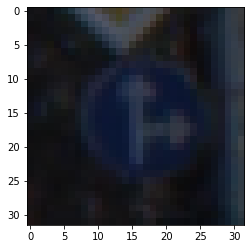

In [29]:
plt.imshow(X_train[1000])

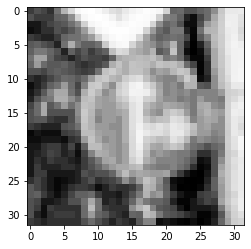

In [32]:
img = X_train[1000]
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.equalizeHist(img)
plt.imshow(img, cmap='gray')

In [0]:
def img_preproc(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.equalizeHist(img)
    return img/255

In [0]:
X_train = np.array(list(map(img_preproc, X_train)))
X_test = np.array(list(map(img_preproc, X_test)))
X_val = np.array(list(map(img_preproc, X_val)))

In [36]:
X_train.shape

(34799, 32, 32)

In [0]:
X_train = X_train.reshape(X_train.shape[0], 32, 32, 1)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 1)
X_val = X_val.reshape(X_val.shape[0], 32, 32, 1)

In [38]:
X_train.shape

(34799, 32, 32, 1)

In [0]:
y_train = keras.utils.np_utils.to_categorical(y_train, 43)
y_test = keras.utils.np_utils.to_categorical(y_test, 43)
y_val = keras.utils.np_utils.to_categorical(y_val, 43)

In [0]:
model = Sequential()

model.add(Conv2D(64, kernel_size=(5,5), strides=2, activation='relu', input_shape = (32,32,1)))
model.add(Dropout(0.5))
model.add(MaxPool2D(2,2))
model.add(Conv2D(32, kernel_size=(3,3), strides=2, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPool2D(2,2))
model.add(Flatten())

model.add(Dense(300, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(43, activation='softmax'))

In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [53]:
h = model.fit(X_train, y_train, epochs=100, batch_size=32,
              validation_data=(X_val, y_val), shuffle=True, verbose=1)

Train on 34799 samples, validate on 4410 samples
Epoch 1/100
34799/34799 [==============================] - 6s 187us/step - loss: 3.1000 - acc: 0.1449 - val_loss: 2.4837 - val_acc: 0.3238
Epoch 2/100
34799/34799 [==============================] - 6s 168us/step - loss: 2.2392 - acc: 0.3250 - val_loss: 2.0254 - val_acc: 0.4308
Epoch 3/100
34799/34799 [==============================] - 6s 169us/step - loss: 2.0319 - acc: 0.3715 - val_loss: 1.8005 - val_acc: 0.4816
Epoch 4/100
34799/34799 [==============================] - 6s 170us/step - loss: 1.9044 - acc: 0.4045 - val_loss: 1.7657 - val_acc: 0.5084
Epoch 5/100
34799/34799 [==============================] - 6s 170us/step - loss: 1.8290 - acc: 0.4231 - val_loss: 1.6675 - val_acc: 0.5052
Epoch 6/100
34799/34799 [==============================] - 6s 167us/step - loss: 1.7785 - acc: 0.4405 - val_loss: 1.6391 - val_acc: 0.5467
Epoch 7/100
34799/34799 [==============================] - 6s 170us/step - loss: 1.7497 - acc: 0.4497 - val_loss: 1.5

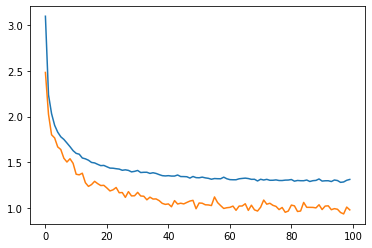

In [54]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])

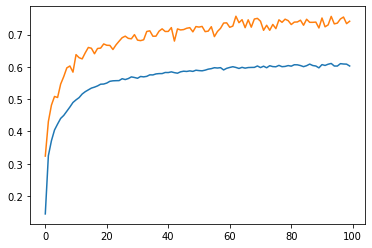

In [55]:
plt.plot(h.history['acc'])
plt.plot(h.history['val_acc'])

In [56]:
model.evaluate(X_test, y_test)

12630/12630 [==============================] - 1s 56us/step


[1.004775002695508, 0.7410926366173268]